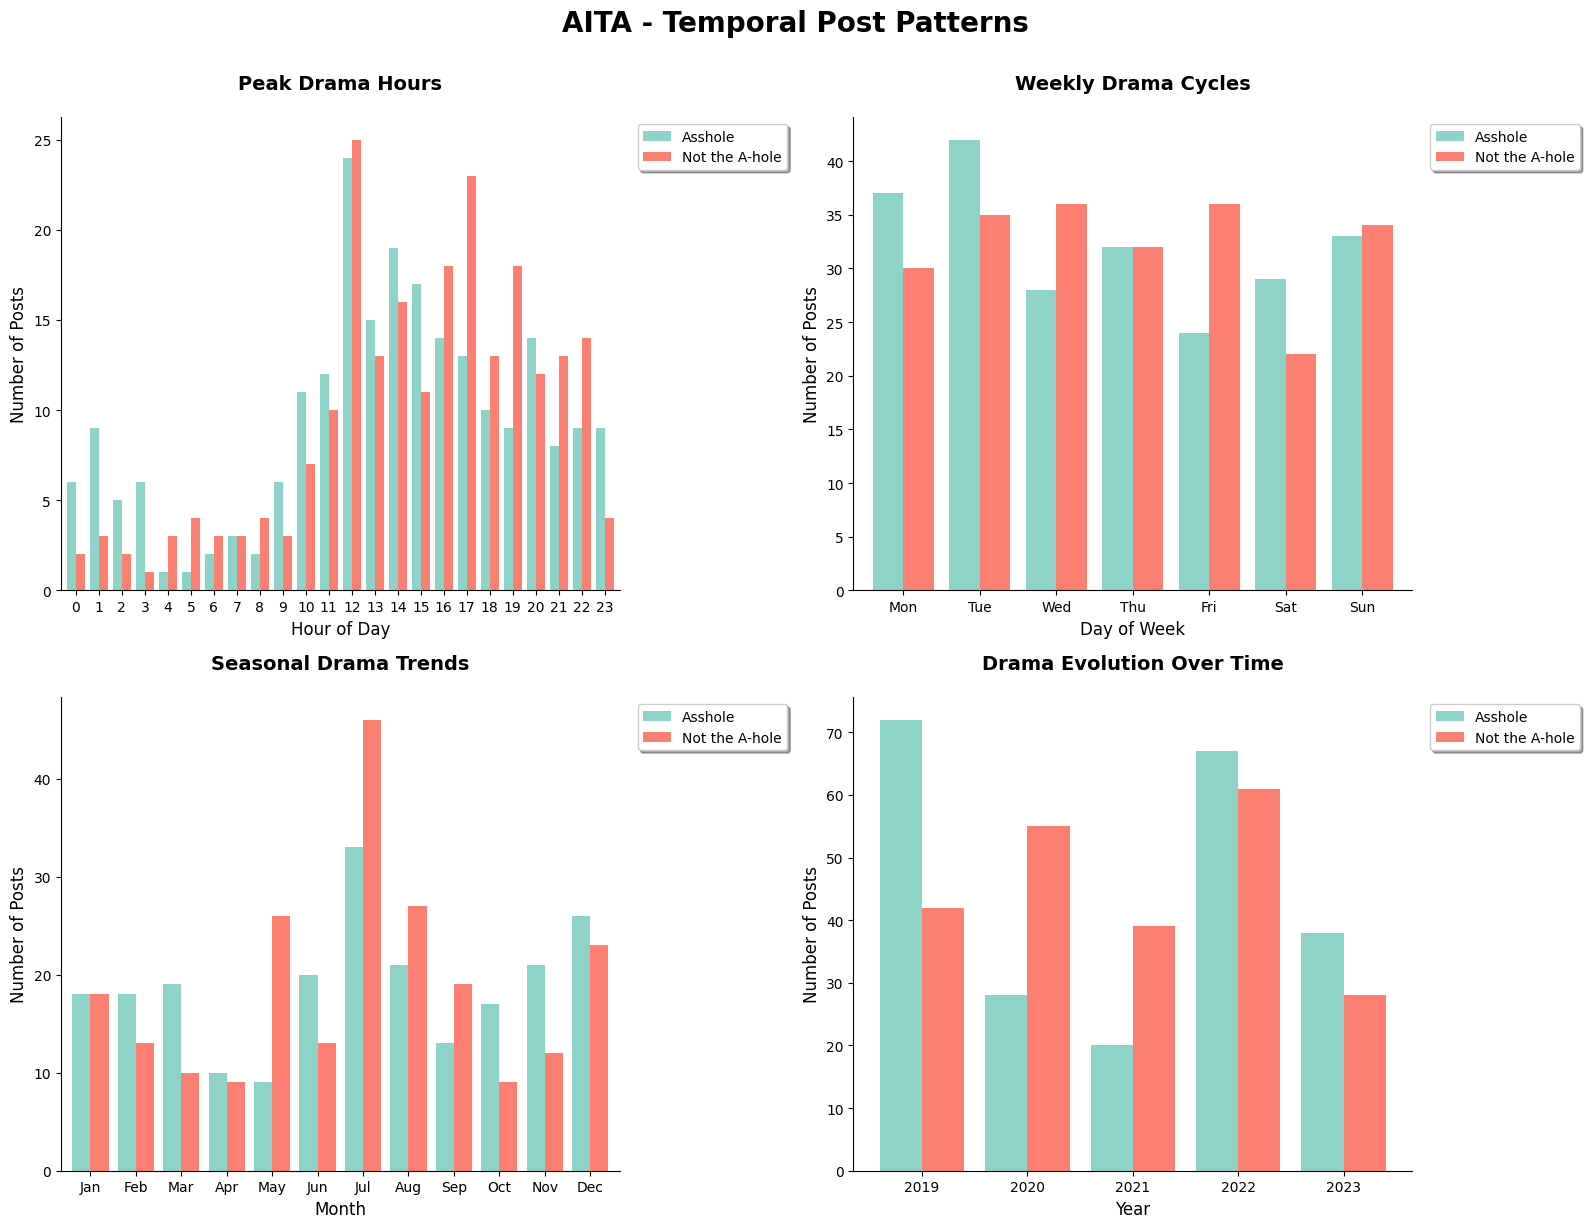

In [1]:
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#8dd3c7', '#fb8072']

# Load data
url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/top450-aita-balanced-comments.csv"
df = pd.read_csv(url, on_bad_lines='skip')
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')
df = df[['created_time', 'flair']].dropna().set_index('created_time')

# Extract time
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

# Figs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('AITA - Temporal Post Patterns', fontsize=20, fontweight='bold', y=1.02)

# Hourly patterns
hourly = df.groupby(['hour', 'flair']).size().unstack(fill_value=0)
hourly.plot(kind='bar', ax=axes[0,0], width=0.8, color=colors)
axes[0,0].set_title('Peak Drama Hours', fontsize=14, fontweight='bold', pad=20)
axes[0,0].set_xlabel('Hour of Day', fontsize=12)
axes[0,0].set_ylabel('Number of Posts', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].grid(False)

# Daily patterns
daily = df.groupby(['day_of_week', 'flair']).size().unstack(fill_value=0)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily.index = day_names
daily.plot(kind='bar', ax=axes[0,1], width=0.8, color=colors)
axes[0,1].set_title('Weekly Drama Cycles', fontsize=14, fontweight='bold', pad=20)
axes[0,1].set_xlabel('Day of Week', fontsize=12)
axes[0,1].set_ylabel('Number of Posts', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].grid(False)

# Monthly patterns
monthly = df.groupby(['month', 'flair']).size().unstack(fill_value=0)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly.index = [month_names[i-1] for i in monthly.index]
monthly.plot(kind='bar', ax=axes[1,0], width=0.8, color=colors)
axes[1,0].set_title('Seasonal Drama Trends', fontsize=14, fontweight='bold', pad=20)
axes[1,0].set_xlabel('Month', fontsize=12)
axes[1,0].set_ylabel('Number of Posts', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=0)
axes[1,0].grid(False)

# Yearly trends
yearly = df.groupby(['year', 'flair']).size().unstack(fill_value=0)
yearly.plot(kind='bar', ax=axes[1,1], width=0.8, color=colors)
axes[1,1].set_title('Drama Evolution Over Time', fontsize=14, fontweight='bold', pad=20)
axes[1,1].set_xlabel('Year', fontsize=12)
axes[1,1].set_ylabel('Number of Posts', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].grid(False)

for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=True, fancybox=True, shadow=True,
              bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [2]:
# Histogram Stats
print("\nHistogram Analysis Stats:")
print(f" Total posts analyzed: {len(df):,}")
print(f" Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")

# Hourly patterns
hourly_totals = hourly.sum(axis=1)
print(f"\n  Hourly Patterns:")
print(f"    Peak hour: {hourly_totals.idxmax()}:00 ({hourly_totals.max()} posts)")
print(f"    Quietest hour: {hourly_totals.idxmin()}:00 ({hourly_totals.min()} posts)")
print(f"    Average posts per hour: {hourly_totals.mean():.1f}")
print(f"    Hour with highest variance: {hourly.var(axis=1).idxmax()}:00")

# Daily patterns
daily_totals = daily.sum(axis=1)
print(f"\n  Weekly Patterns:")
print(f"    Most active day: {daily_totals.idxmax()} ({daily_totals.max()} posts)")
print(f"    Quietest day: {daily_totals.idxmin()} ({daily_totals.min()} posts)")
print(f"    Average posts per day: {daily_totals.mean():.1f}")
print(f"    Weekend vs Weekday ratio: {(daily_totals[['Sat', 'Sun']].sum() / daily_totals[['Mon', 'Tue', 'Wed', 'Thu', 'Fri']].sum()):.2f}")

# Monthly patterns
monthly_totals = monthly.sum(axis=1)
print(f"\n  Monthly Patterns:")
print(f"    Peak month: {monthly_totals.idxmax()} ({monthly_totals.max():.0f} posts)")
print(f"    Quietest month: {monthly_totals.idxmin()} ({monthly_totals.min():.0f} posts)")
print(f"    Average posts per month: {monthly_totals.mean():.1f}")
print(f"    Summer vs Winter ratio: {(monthly_totals[['Jun', 'Jul', 'Aug']].sum() / monthly_totals[['Dec', 'Jan', 'Feb']].sum()):.2f}")

# Yearly patterns
yearly_totals = yearly.sum(axis=1)
print(f"\n  Yearly Trends:")
print(f"    Most active year: {yearly_totals.idxmax()} ({yearly_totals.max()} posts)")
print(f"    Least active year: {yearly_totals.idxmin()} ({yearly_totals.min()} posts)")
print(f"    Average posts per year: {yearly_totals.mean():.1f}")
print(f"    Year-over-year growth rate: {((yearly_totals.iloc[-1] / yearly_totals.iloc[0]) - 1) * 100:.1f}%")

# Flair distribution
flair_counts = df['flair'].value_counts()
print(f"\n  Flair Distribution:")
for flair, count in flair_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {flair}: {count} posts ({percentage:.1f}%)")


Histogram Analysis Stats:
 Total posts analyzed: 450
 Date range: 2019-01-04 to 2023-11-18

  Hourly Patterns:
    Peak hour: 12:00 (49 posts)
    Quietest hour: 4:00 (4 posts)
    Average posts per hour: 18.8
    Hour with highest variance: 17:00

  Weekly Patterns:
    Most active day: Tue (77 posts)
    Quietest day: Sat (51 posts)
    Average posts per day: 64.3
    Weekend vs Weekday ratio: 0.36

  Monthly Patterns:
    Peak month: Jul (79 posts)
    Quietest month: Apr (19 posts)
    Average posts per month: 37.5
    Summer vs Winter ratio: 1.38

  Yearly Trends:
    Most active year: 2022 (128 posts)
    Least active year: 2021 (59 posts)
    Average posts per year: 90.0
    Year-over-year growth rate: -42.1%

  Flair Distribution:
  Asshole: 225 posts (50.0%)
  Not the A-hole: 225 posts (50.0%)


In [3]:
url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/top450-aita-balanced-comments.csv"
df = pd.read_csv(url, on_bad_lines='skip')
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')

def analyze_comments(df):
    df['all_authors'] = df.apply(lambda row:
        (row['level1_authors'] or []) +
        (row['level2_authors'] or []) +
        (row['level3_authors'] or []), axis=1)

    df['all_bodies'] = df.apply(lambda row:
        (row['level1_bodies'] or []) +
        (row['level2_bodies'] or []) +
        (row['level3_bodies'] or []), axis=1)

    df['comments_by_users'] = df.apply(lambda row:
        sum(1 for a in row['all_authors'] if a and a != row['author']), axis=1)

    df['total_comment_length'] = df['all_bodies'].apply(lambda bodies:
        sum(len(str(comment)) for comment in bodies if comment))

    # Individualistic approach
    # -- (each body length in each level)
    # -- (each comment count by each outher in each level)
    df['level1_comments_by_users'] = df.apply(lambda row:
        sum(1 for a in (row['level1_authors'] or []) if a and a != row['author']), axis=1)
    df['level2_comments_by_users'] = df.apply(lambda row:
        sum(1 for a in (row['level2_authors'] or []) if a and a != row['author']), axis=1)
    df['level3_comments_by_users'] = df.apply(lambda row:
        sum(1 for a in (row['level3_authors'] or []) if a and a != row['author']), axis=1)

    df['level1_comment_length'] = df.apply(lambda row:
        sum(len(str(comment)) for comment in (row['level1_bodies'] or []) if comment), axis=1)
    df['level2_comment_length'] = df.apply(lambda row:
        sum(len(str(comment)) for comment in (row['level2_bodies'] or []) if comment), axis=1)
    df['level3_comment_length'] = df.apply(lambda row:
        sum(len(str(comment)) for comment in (row['level3_bodies'] or []) if comment), axis=1)

    return df


df_analyzed = analyze_comments(df)
df_analyzed['year_month'] = df_analyzed['created_time'].dt.to_period('M')

time_grouped = df_analyzed.groupby(['year_month', 'flair']).agg({
    'comments_by_users': 'mean',
    'total_comment_length': 'mean',
    'level1_comments_by_users': 'mean',
    'level2_comments_by_users': 'mean',
    'level3_comments_by_users': 'mean',
    'level1_comment_length': 'mean',
    'level2_comment_length': 'mean',
    'level3_comment_length': 'mean'
}).reset_index()

<ipython-input-3-38645c832aa1>:43: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_analyzed['year_month'] = df_analyzed['created_time'].dt.to_period('M')


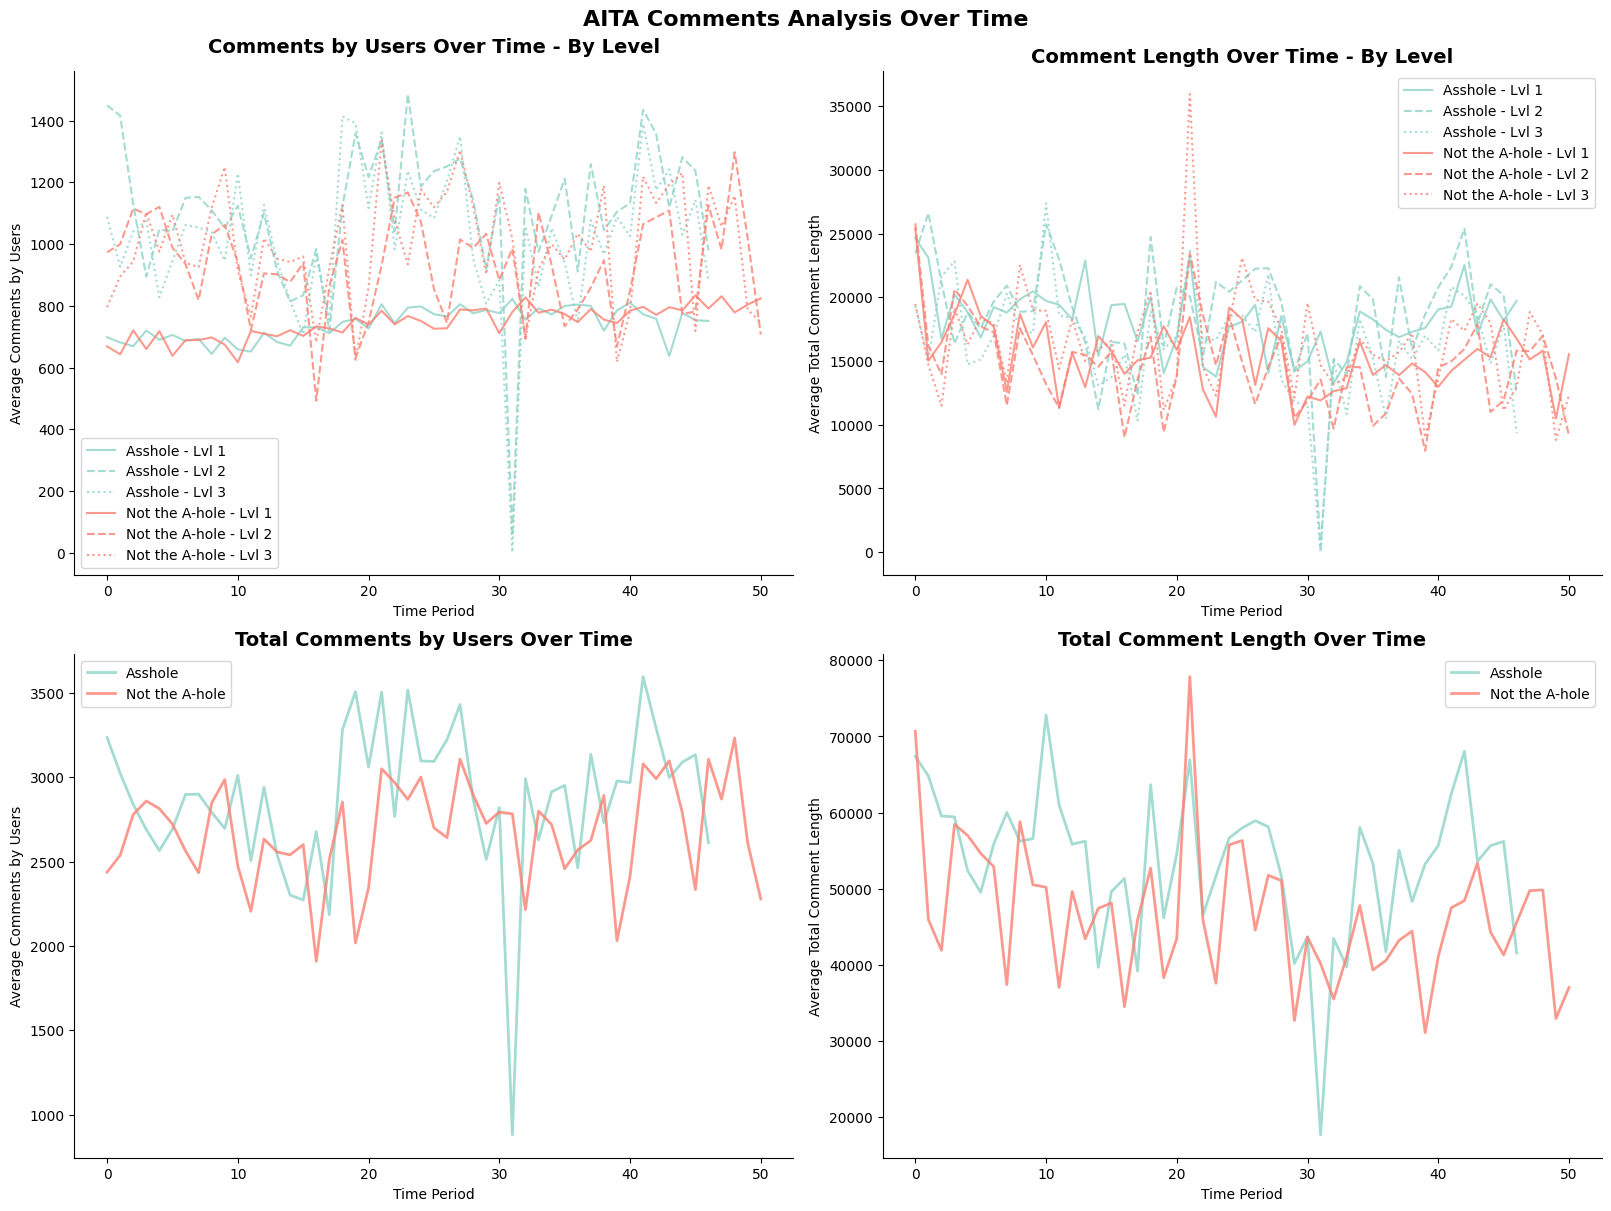

Data spans from 2019-01 to 2023-11
Total time periods: 58


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)

# Comments by users in each level
for flair_idx, flair in enumerate(['Asshole', 'Not the A-hole']):
    flair_data = time_grouped[time_grouped['flair'] == flair]
    x = range(len(flair_data))

    axes[0, 0].plot(x, flair_data['level1_comments_by_users'],
                    label=f'{flair} - Lvl 1', color=colors[flair_idx], linestyle='-', alpha=0.8)
    axes[0, 0].plot(x, flair_data['level2_comments_by_users'],
                    label=f'{flair} - Lvl 2', color=colors[flair_idx], linestyle='--', alpha=0.8)
    axes[0, 0].plot(x, flair_data['level3_comments_by_users'],
                    label=f'{flair} - Lvl 3', color=colors[flair_idx], linestyle=':', alpha=0.8)

axes[0, 0].set_title('Comments by Users Over Time - By Level', fontsize=14, fontweight='bold', y=1.02)
axes[0, 0].set_xlabel('Time Period')
axes[0, 0].set_ylabel('Average Comments by Users')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Total comment length by level
for flair_idx, flair in enumerate(['Asshole', 'Not the A-hole']):
    flair_data = time_grouped[time_grouped['flair'] == flair]
    x = range(len(flair_data))

    axes[0, 1].plot(x, flair_data['level1_comment_length'],
                    label=f'{flair} - Lvl 1', color=colors[flair_idx], linestyle='-', alpha=0.8)
    axes[0, 1].plot(x, flair_data['level2_comment_length'],
                    label=f'{flair} - Lvl 2', color=colors[flair_idx], linestyle='--', alpha=0.8)
    axes[0, 1].plot(x, flair_data['level3_comment_length'],
                    label=f'{flair} - Lvl 3', color=colors[flair_idx], linestyle=':', alpha=0.8)

axes[0, 1].set_title('Comment Length Over Time - By Level', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Time Period')
axes[0, 1].set_ylabel('Average Total Comment Length')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Combined metrics over time - users
for flair_idx, flair in enumerate(['Asshole', 'Not the A-hole']):
    flair_data = time_grouped[time_grouped['flair'] == flair]
    x = range(len(flair_data))

    axes[1, 0].plot(x, flair_data['comments_by_users'],
                    label=f'{flair}', color=colors[flair_idx], linewidth=2, alpha=0.8)

axes[1, 0].set_title('Total Comments by Users Over Time', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Time Period')
axes[1, 0].set_ylabel('Average Comments by Users')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Combined metrics over time - comment length
for flair_idx, flair in enumerate(['Asshole', 'Not the A-hole']):
    flair_data = time_grouped[time_grouped['flair'] == flair]
    x = range(len(flair_data))

    axes[1, 1].plot(x, flair_data['total_comment_length'],
                    label=f'{flair}', color=colors[flair_idx], linewidth=2, alpha=0.8)

axes[1, 1].set_title('Total Comment Length Over Time', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Time Period')
axes[1, 1].set_ylabel('Average Total Comment Length')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

for ax in axes.flat:
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle('AITA Comments Analysis Over Time', fontsize=16, fontweight='bold')
plt.show()

unique_periods = sorted(time_grouped['year_month'].unique())
print(f"Data spans from {unique_periods[0]} to {unique_periods[-1]}")
print(f"Total time periods: {len(unique_periods)}")

In [10]:
## We merge, in order to get timestamps for posts

# Main data
main_url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/top450-aita-balanced-comments.csv"
df = pd.read_csv(main_url, on_bad_lines='skip')

# Sentiment Data
sentiment_url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/comments_with_bert.csv"
comments_df = pd.read_csv(sentiment_url, on_bad_lines='skip')

# Merge
sub_times = df[["submission_id", "created_time"]].drop_duplicates()
comments_df = comments_df.merge(sub_times, on="submission_id", how="left")

In [11]:
data = df = comments_df.groupby(['submission_id', 'flair', 'created_time']).agg({
        'afinn': 'mean',
        'ncrlex': 'mean',
        'vader': 'mean',
        'bert_score': 'mean'
}).reset_index()

sentiment_metrics = [
        ('afinn', 'AFINN'),
        ('vader', 'VADER'),
        ('ncrlex', 'NCRLex'),
        ('bert_score', 'BERT')]

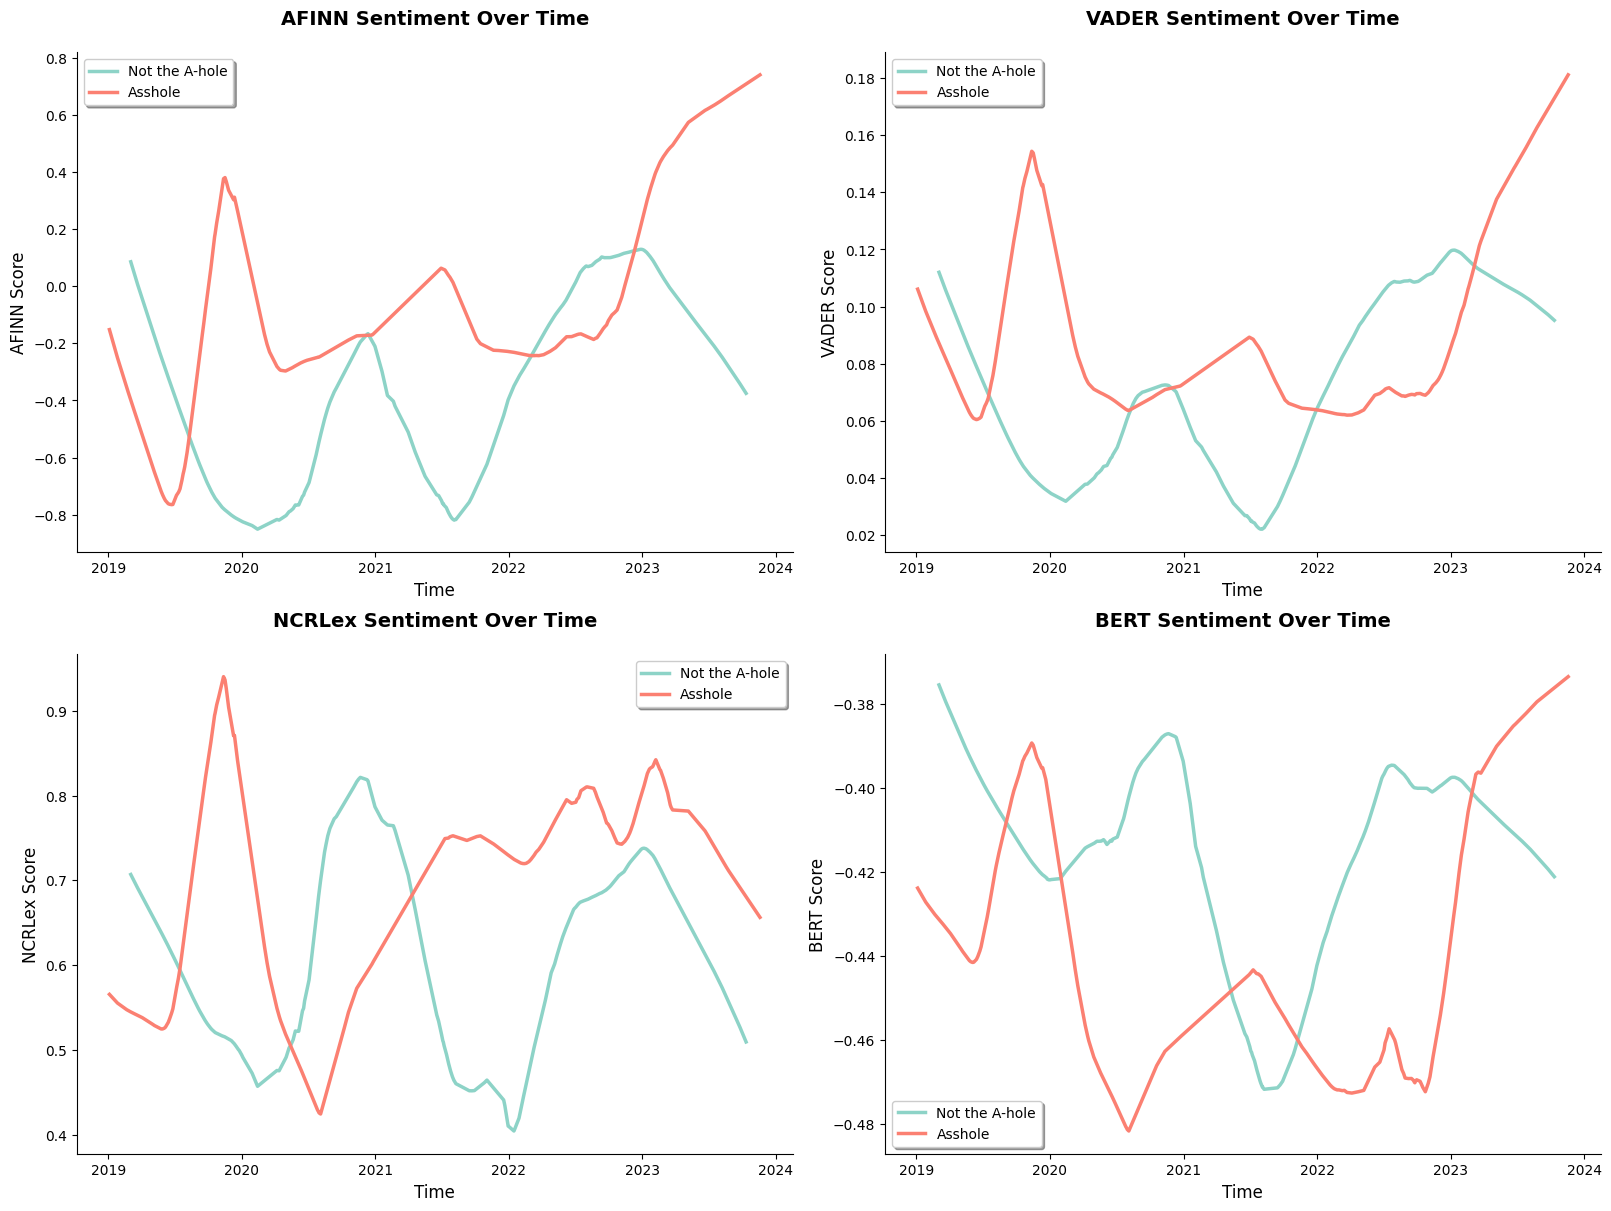

In [12]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()

for idx, (col, title) in enumerate(sentiment_metrics):
  ax = axes[idx]
  for i, flair in enumerate(data['flair'].unique()):
    flair_data = data[data['flair'] == flair].sort_values('created_time')

    x_numeric = pd.to_datetime(flair_data['created_time']).astype(np.int64) // 10**9
    y = flair_data[col].values

    # Apply smoothing
    smoothed = lowess(y, x_numeric, frac=0.3)

    ax.plot(pd.to_datetime(smoothed[:, 0], unit='s'), smoothed[:, 1],
    label=flair, color=colors[i], linewidth=2.5)

    ax.set_title(f'{title} Sentiment Over Time', fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel(f'{title} Score', fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.grid(False)
    ax.legend(frameon=True, fancybox=True, shadow=True)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [13]:
print("\nSentiment Analysis Stats:")
for col in ['afinn', 'vader', 'ncrlex', 'bert_score']:
  print(f"\n Average {col.upper()} scores:")
  for flair in data['flair'].unique():
    flair_mean = data[data['flair'] == flair][col].mean()
    print(f"   {flair}: {flair_mean:.3f}")


Sentiment Analysis Stats:

 Average AFINN scores:
   Not the A-hole: -0.477
   Asshole: -0.141

 Average VADER scores:
   Not the A-hole: 0.064
   Asshole: 0.083

 Average NCRLEX scores:
   Not the A-hole: 0.637
   Asshole: 0.703

 Average BERT_SCORE scores:
   Not the A-hole: -0.400
   Asshole: -0.427
